Starting Premier League Fixture Difficulty Analysis...
Loaded fixtures for 20 teams
Calculated difficulty ratings


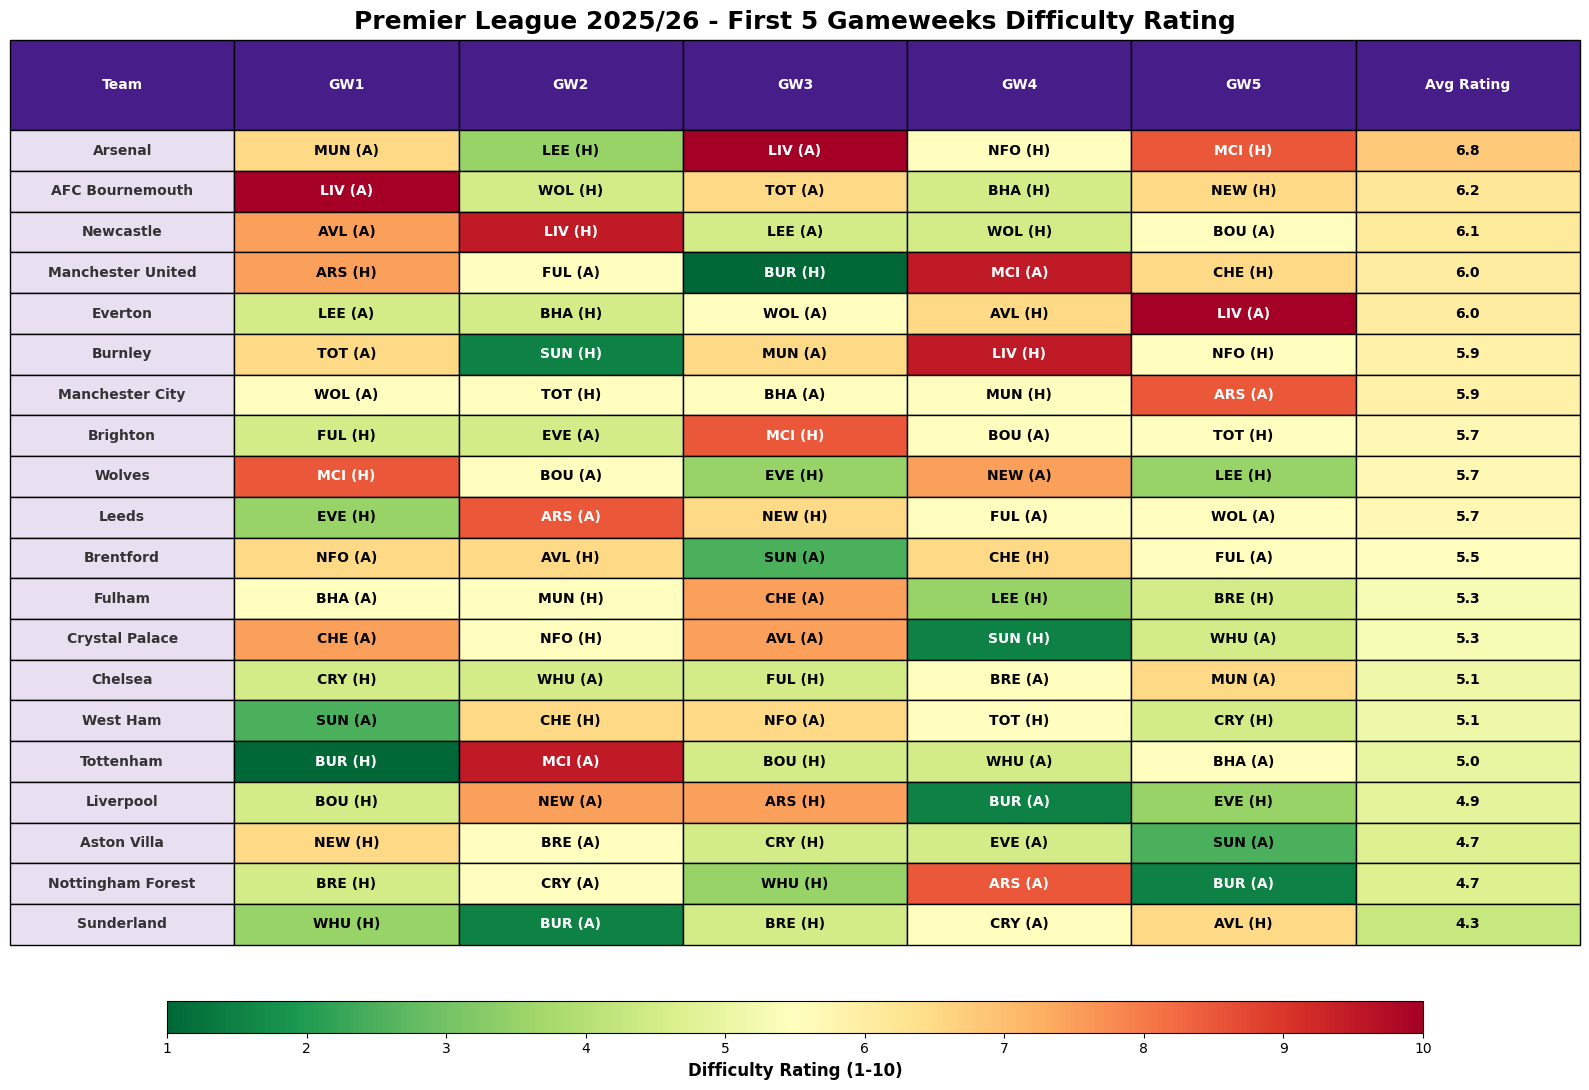

Generated visualization

DIFFICULTY RANKING SUMMARY (First 5 Gameweeks)
 1. Arsenal              - 6.8/10
 2. AFC Bournemouth      - 6.2/10
 3. Newcastle            - 6.1/10
 4. Manchester United    - 6.0/10
 5. Everton              - 6.0/10
 6. Burnley              - 5.9/10
 7. Manchester City      - 5.9/10
 8. Brighton             - 5.7/10
 9. Wolves               - 5.7/10
10. Leeds                - 5.7/10
11. Brentford            - 5.5/10
12. Fulham               - 5.3/10
13. Crystal Palace       - 5.3/10
14. Chelsea              - 5.1/10
15. West Ham             - 5.1/10
16. Tottenham            - 5.0/10
17. Liverpool            - 4.9/10
18. Aston Villa          - 4.7/10
19. Nottingham Forest    - 4.7/10
20. Sunderland           - 4.3/10

TEAM DIFFICULTY RATINGS USED:
Liverpool            - 10/10
Manchester City      - 9/10
Arsenal              - 8/10
Chelsea              - 7/10
Aston Villa          - 7/10
Newcastle            - 7/10
Nottingham Forest    - 6/10
Tottenham           

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("RdYlGn_r")

class PLFixtureAnalyzer:
    def __init__(self):
        # Updated team difficulty ratings (1-10 scale as specified)
        self.team_difficulty_ratings = {
            'Liverpool': 10,
            'Manchester City': 9,
            'Arsenal': 8,
            'Chelsea': 7,
            'Aston Villa': 7,
            'Newcastle': 7,
            'Nottingham Forest': 6,
            'Tottenham': 6,
            'Manchester United': 6,
            'AFC Bournemouth': 5,
            'Brentford': 5,
            'Brighton': 5,
            'Fulham': 5,
            'Crystal Palace': 5,
            'Wolves': 4,
            'Everton': 4,
            'West Ham': 4,
            'Leeds': 4,
            'Sunderland': 2,
            'Burnley': 1
        }

        # Team name mappings for consistency
        self.team_mappings = {
            'Man City': 'Manchester City',
            'Man Utd': 'Manchester United',
            'Man United': 'Manchester United',
            'Spurs': 'Tottenham',
            'Wolves': 'Wolverhampton',
            'Brighton & Hove Albion': 'Brighton',
            'Tottenham Hotspur': 'Tottenham',
            'West Ham United': 'West Ham',
            'Leeds United': 'Leeds',
            'Wolverhampton': 'Wolves',
            'Newcastle United': 'Newcastle'
        }

    def normalize_team_name(self, team_name):
        """Normalize team names for consistency"""
        team_name = team_name.strip()
        return self.team_mappings.get(team_name, team_name)

    def get_difficulty_score(self, opponent, is_home):
        """Calculate difficulty score based on opponent strength and venue"""
        # Normalize opponent name
        opponent = self.normalize_team_name(opponent)

        # Get base difficulty from our ratings
        base_difficulty = self.team_difficulty_ratings.get(opponent, 5)

        # Adjust for home/away (home games are slightly easier)
        venue_adjustment = -0.5 if is_home else 0.5

        final_score = max(1, min(10, base_difficulty + venue_adjustment))
        return round(final_score, 1)

    def get_actual_fixtures(self):
        """Get the actual Premier League 2025/26 fixtures from Gameweeks 1-5"""
        fixtures_data = {
            # Gameweek 1
            'Liverpool': [('AFC Bournemouth', True)],
            'Aston Villa': [('Newcastle', True)],
            'Brighton': [('Fulham', True)],
            'Nottingham Forest': [('Brentford', True)],
            'Sunderland': [('West Ham', True)],
            'Tottenham': [('Burnley', True)],
            'Wolves': [('Manchester City', True)],
            'Chelsea': [('Crystal Palace', True)],
            'Manchester United': [('Arsenal', True)],
            'Leeds': [('Everton', True)],
            'AFC Bournemouth': [('Liverpool', False)],
            'Newcastle': [('Aston Villa', False)],
            'Fulham': [('Brighton', False)],
            'Brentford': [('Nottingham Forest', False)],
            'West Ham': [('Sunderland', False)],
            'Burnley': [('Tottenham', False)],
            'Manchester City': [('Wolves', False)],
            'Crystal Palace': [('Chelsea', False)],
            'Arsenal': [('Manchester United', False)],
            'Everton': [('Leeds', False)]
        }

        # Gameweek 2
        gameweek_2 = {
            'AFC Bournemouth': ('Wolves', True),
            'Arsenal': ('Leeds', True),
            'Brentford': ('Aston Villa', True),
            'Burnley': ('Sunderland', True),
            'Crystal Palace': ('Nottingham Forest', True),
            'Everton': ('Brighton', True),
            'Fulham': ('Manchester United', True),
            'Manchester City': ('Tottenham', True),
            'Newcastle': ('Liverpool', True),
            'West Ham': ('Chelsea', True),
            'Wolves': ('AFC Bournemouth', False),
            'Leeds': ('Arsenal', False),
            'Aston Villa': ('Brentford', False),
            'Sunderland': ('Burnley', False),
            'Nottingham Forest': ('Crystal Palace', False),
            'Brighton': ('Everton', False),
            'Manchester United': ('Fulham', False),
            'Tottenham': ('Manchester City', False),
            'Liverpool': ('Newcastle', False),
            'Chelsea': ('West Ham', False)
        }

        # Add Gameweek 2 fixtures
        for team, (opponent, is_home) in gameweek_2.items():
            if team in fixtures_data:
                fixtures_data[team].append((opponent, is_home))
            else:
                fixtures_data[team] = [(opponent, is_home)]

        # Gameweek 3
        gameweek_3 = {
            'Aston Villa': ('Crystal Palace', True),
            'Brighton': ('Manchester City', True),
            'Chelsea': ('Fulham', True),
            'Leeds': ('Newcastle', True),
            'Liverpool': ('Arsenal', True),
            'Manchester United': ('Burnley', True),
            'Nottingham Forest': ('West Ham', True),
            'Sunderland': ('Brentford', True),
            'Tottenham': ('AFC Bournemouth', True),
            'Wolves': ('Everton', True),
            'Crystal Palace': ('Aston Villa', False),
            'Manchester City': ('Brighton', False),
            'Fulham': ('Chelsea', False),
            'Newcastle': ('Leeds', False),
            'Arsenal': ('Liverpool', False),
            'Burnley': ('Manchester United', False),
            'West Ham': ('Nottingham Forest', False),
            'Brentford': ('Sunderland', False),
            'AFC Bournemouth': ('Tottenham', False),
            'Everton': ('Wolves', False)
        }

        # Add Gameweek 3 fixtures
        for team, (opponent, is_home) in gameweek_3.items():
            if team in fixtures_data:
                fixtures_data[team].append((opponent, is_home))
            else:
                fixtures_data[team] = [(opponent, is_home)]

        # Gameweek 4
        gameweek_4 = {
            'AFC Bournemouth': ('Brighton', True),
            'Arsenal': ('Nottingham Forest', True),
            'Brentford': ('Chelsea', True),
            'Burnley': ('Liverpool', True),
            'Crystal Palace': ('Sunderland', True),
            'Everton': ('Aston Villa', True),
            'Fulham': ('Leeds', True),
            'Manchester City': ('Manchester United', True),
            'Newcastle': ('Wolves', True),
            'West Ham': ('Tottenham', True),
            'Brighton': ('AFC Bournemouth', False),
            'Nottingham Forest': ('Arsenal', False),
            'Chelsea': ('Brentford', False),
            'Liverpool': ('Burnley', False),
            'Sunderland': ('Crystal Palace', False),
            'Aston Villa': ('Everton', False),
            'Leeds': ('Fulham', False),
            'Manchester United': ('Manchester City', False),
            'Wolves': ('Newcastle', False),
            'Tottenham': ('West Ham', False)
        }

        # Add Gameweek 4 fixtures
        for team, (opponent, is_home) in gameweek_4.items():
            if team in fixtures_data:
                fixtures_data[team].append((opponent, is_home))
            else:
                fixtures_data[team] = [(opponent, is_home)]

        # Gameweek 5
        gameweek_5 = {
            'AFC Bournemouth': ('Newcastle', True),
            'Arsenal': ('Manchester City', True),
            'Brighton': ('Tottenham', True),
            'Burnley': ('Nottingham Forest', True),
            'Fulham': ('Brentford', True),
            'Liverpool': ('Everton', True),
            'Manchester United': ('Chelsea', True),
            'Sunderland': ('Aston Villa', True),
            'West Ham': ('Crystal Palace', True),
            'Wolves': ('Leeds', True),
            'Newcastle': ('AFC Bournemouth', False),
            'Manchester City': ('Arsenal', False),
            'Tottenham': ('Brighton', False),
            'Nottingham Forest': ('Burnley', False),
            'Brentford': ('Fulham', False),
            'Everton': ('Liverpool', False),
            'Chelsea': ('Manchester United', False),
            'Aston Villa': ('Sunderland', False),
            'Crystal Palace': ('West Ham', False),
            'Leeds': ('Wolves', False)
        }

        # Add Gameweek 5 fixtures
        for team, (opponent, is_home) in gameweek_5.items():
            if team in fixtures_data:
                fixtures_data[team].append((opponent, is_home))
            else:
                fixtures_data[team] = [(opponent, is_home)]

        return fixtures_data

    def calculate_team_ratings(self, fixtures_data):
        """Calculate average difficulty rating for each team"""
        team_ratings = {}

        for team, fixtures in fixtures_data.items():
            total_difficulty = 0
            fixture_count = len(fixtures)

            for opponent, is_home in fixtures:
                opponent = self.normalize_team_name(opponent)
                difficulty = self.get_difficulty_score(opponent, is_home)
                total_difficulty += difficulty

            avg_difficulty = total_difficulty / fixture_count if fixture_count > 0 else 0
            team_ratings[team] = {
                'avg_difficulty': round(avg_difficulty, 1),
                'fixtures': fixtures,
                'fixture_count': fixture_count
            }

        return team_ratings

    def get_team_abbreviation(self, team_name):
        """Get 3-letter abbreviation for team names"""
        abbreviations = {
            'Arsenal': 'ARS', 'Aston Villa': 'AVL', 'AFC Bournemouth': 'BOU',
            'Brentford': 'BRE', 'Brighton': 'BHA', 'Burnley': 'BUR', 'Chelsea': 'CHE',
            'Crystal Palace': 'CRY', 'Everton': 'EVE', 'Fulham': 'FUL',
            'Leeds': 'LEE', 'Liverpool': 'LIV',
            'Manchester City': 'MCI', 'Manchester United': 'MUN', 'Newcastle': 'NEW',
            'Nottingham Forest': 'NFO', 'Sunderland': 'SUN', 'Tottenham': 'TOT',
            'West Ham': 'WHU', 'Wolves': 'WOL'
        }
        return abbreviations.get(team_name, team_name[:3].upper())

    def create_visualization(self, team_ratings):
        """Create a visually appealing fixture difficulty table"""
        # Prepare data for visualization
        teams = []
        difficulties = []
        fixtures_display = []
        fixture_difficulties = []  # Store individual fixture difficulties

        for team, data in team_ratings.items():
            teams.append(team)
            difficulties.append(data['avg_difficulty'])

            # Format fixtures for display and store individual difficulties
            fixture_list = []
            fixture_diff_list = []
            for opponent, is_home in data['fixtures']:
                venue = "(H)" if is_home else "(A)"
                abbrev = self.get_team_abbreviation(self.normalize_team_name(opponent))
                fixture_list.append(f"{abbrev} {venue}")
                # Get individual fixture difficulty
                fixture_diff = self.get_difficulty_score(opponent, is_home)
                fixture_diff_list.append(fixture_diff)

            fixtures_display.append(fixture_list)
            fixture_difficulties.append(fixture_diff_list)

        # Sort by difficulty (hardest first)
        sorted_data = sorted(zip(teams, difficulties, fixtures_display, fixture_difficulties),
                           key=lambda x: x[1], reverse=True)

        teams_sorted = [item[0] for item in sorted_data]
        difficulties_sorted = [item[1] for item in sorted_data]
        fixtures_sorted = [item[2] for item in sorted_data]
        fixture_difficulties_sorted = [item[3] for item in sorted_data]

        # Create the plot
        fig, ax = plt.subplots(figsize=(16, 12))

        # Create table data
        table_data = []
        for i, (team, difficulty, fixtures) in enumerate(zip(teams_sorted, difficulties_sorted, fixtures_sorted)):
            row = [team] + fixtures + [f"{difficulty}"]
            table_data.append(row)

        # Create table
        table = ax.table(cellText=table_data,
                        colLabels=['Team', 'GW1', 'GW2', 'GW3', 'GW4', 'GW5', 'Avg Rating'],
                        cellLoc='center',
                        loc='center',
                        bbox=[0, 0, 1, 1])

        # Style the table
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)

        # Color code cells individually based on fixture difficulty
        for i in range(len(teams_sorted)):
            # Team name column - light purple/white color
            table[(i+1, 0)].set_facecolor('#E8E0F0')
            table[(i+1, 0)].set_text_props(weight='bold', color='#333333')

            # Individual fixture columns (GW1-GW5)
            for j in range(1, 6):  # Columns 1-5 are the gameweeks
                if j-1 < len(fixture_difficulties_sorted[i]):  # Check if fixture exists
                    fixture_diff = fixture_difficulties_sorted[i][j-1]
                    # Normalize difficulty for color mapping (1-10 scale)
                    normalized_diff = (fixture_diff - 1) / (10 - 1)
                    fixture_color = plt.cm.RdYlGn_r(normalized_diff)
                    table[(i+1, j)].set_facecolor(fixture_color)

                    # Set font color based on fixture difficulty (white for dark cells)
                    if fixture_diff >= 8:  # Very difficult opponents (Liverpool, Man City, Arsenal)
                        table[(i+1, j)].set_text_props(weight='bold', color='white')
                    elif fixture_diff <= 2:  # Very easy opponents (Burnley, Sunderland)
                        table[(i+1, j)].set_text_props(weight='bold', color='white')
                    else:
                        table[(i+1, j)].set_text_props(weight='bold', color='black')
                else:
                    # No fixture - neutral color
                    table[(i+1, j)].set_facecolor('#F0F0F0')

            # Average rating column - use overall average
            avg_normalized = (difficulties_sorted[i] - 1) / (10 - 1)
            avg_color = plt.cm.RdYlGn_r(avg_normalized)
            table[(i+1, 6)].set_facecolor(avg_color)

            # Set font color for average column based on difficulty
            if difficulties_sorted[i] >= 8:
                table[(i+1, 6)].set_text_props(weight='bold', color='white')
            elif difficulties_sorted[i] <= 4:
                table[(i+1, 6)].set_text_props(weight='bold', color='white')
            else:
                table[(i+1, 6)].set_text_props(weight='bold', color='black')

        # Style header - dark purple with white text
        for j in range(7):
            table[(0, j)].set_facecolor('#471d8a')
            table[(0, j)].set_text_props(weight='bold', color='white')
            table[(0, j)].set_height(0.08)

        # Remove axes
        ax.axis('off')

        # Add title
        plt.suptitle('Premier League 2025/26 - First 5 Gameweeks Difficulty Rating',
                    fontsize=18, fontweight='bold', y=0.98)

        # Add color scale legend
        sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn_r,
                                  norm=plt.Normalize(vmin=1, vmax=10))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, orientation='horizontal',
                           pad=0.05, shrink=0.8, aspect=40)
        cbar.set_label('Difficulty Rating (1-10)', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.show()

        return fig

    def run_analysis(self):
        """Run the complete fixture difficulty analysis"""
        print("Starting Premier League Fixture Difficulty Analysis...")
        print("=" * 60)

        # Get fixture data
        fixtures_data = self.get_actual_fixtures()
        print(f"Loaded fixtures for {len(fixtures_data)} teams")

        # Calculate ratings
        team_ratings = self.calculate_team_ratings(fixtures_data)
        print("Calculated difficulty ratings")

        # Create visualization
        fig = self.create_visualization(team_ratings)
        print("Generated visualization")

        # Print summary
        print("\n" + "=" * 60)
        print("DIFFICULTY RANKING SUMMARY (First 5 Gameweeks)")
        print("=" * 60)

        sorted_teams = sorted(team_ratings.items(),
                            key=lambda x: x[1]['avg_difficulty'], reverse=True)

        for i, (team, data) in enumerate(sorted_teams, 1):
            print(f"{i:2d}. {team:<20} - {data['avg_difficulty']}/10")

        print("\n" + "=" * 60)
        print("TEAM DIFFICULTY RATINGS USED:")
        print("=" * 60)
        for team, rating in sorted(self.team_difficulty_ratings.items(), key=lambda x: x[1], reverse=True):
            print(f"{team:<20} - {rating}/10")

        return team_ratings, fig

# Run the analysis
if __name__ == "__main__":
    analyzer = PLFixtureAnalyzer()
    team_ratings, visualization = analyzer.run_analysis()